### Import Pandas and Numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

### Load housing dataset

In [3]:
houses_df = pd.read_csv("input.csv")

### Select Feature Vectors

In [4]:
keep_col = [
    "price",
    "sqft_lot"
]

houses_df = houses_df[keep_col]
houses_df.columns= ["price", "sqft"]
houses_df["price"] = houses_df["price"].apply(lambda x: x/1000)
houses_df["sqft"] = houses_df["sqft"].apply(lambda x: x/1000)

### Linear Regression Model

h(x) = c + mx

where,<br/>
h(x) = price of house to be predicted<br/>
x = square feet of house<br/>
c, m = constants

<IPython.core.display.Javascript object>


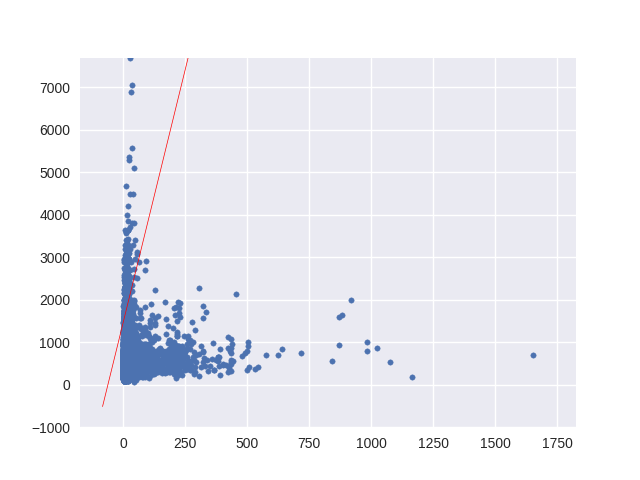

Training complete
Total Iterations:  50
m:  23.8223623921
c:  -513.815653519
Total error:  762541.171056


In [6]:
m = 0
c = 0
fig = plt.figure()
_ = plt.scatter(houses_df["sqft"], houses_df["price"], s=15)

learning_rate = 0.001
total_obs = len(houses_df)

new_m = m
new_c = c

def calculate_error():
    global new_m
    global new_c
    
    error_sum = 0
    for index, sample in houses_df.iterrows():
        error_sum += (((new_c + (new_m * sample["sqft"])) - sample["price"]) ** 2) 
    error = error_sum / (2 * total_obs)
    return error

def calculate_m_deriv():
    global new_m
    global new_c
    
    m_sum = 0
    for index, sample in houses_df.iterrows():
        m_sum += ((new_c + (new_m * sample["sqft"])) - sample["price"])
    return m_sum

def calculate_c_deriv():
    global new_m
    global new_c
    
    c_sum = 0
    for index, sample in houses_df.iterrows():
        c_sum += (((new_c + (new_m * sample["sqft"])) - sample["price"]) * sample["sqft"])
    return c_sum

iterations = 0
while iterations < 50:   
    temp_m = new_m - (learning_rate * calculate_m_deriv()) / total_obs
    temp_c = new_c - (learning_rate * calculate_c_deriv()) / total_obs
    
    new_m = temp_m
    new_c = temp_c
    iterations += 1

print("Training complete")
print("Total Iterations: ", iterations)
print("m: ", new_m)
print("c: ", new_c)
print("Total error: ", calculate_error())

x_min, x_max = plt.gca().get_xlim()
y_min, y_max = new_c, new_c + (new_m * (x_max - x_min))
_ = plt.plot([x_min, x_max], [y_min, y_max], color="r", linewidth=0.5)

_ = plt.gca().set_ylim(-1000, np.max(houses_df["price"]))